In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import csv

In [14]:
import pandas as pd

rutas_archivos = [
    'chunk1.csv',
    'chunk2.csv',
    'chunk3.csv',
    'chunk4.csv',

]

# Lista para almacenar todos los datos de todos los archivos
todos_los_datos = []

# Iterar a través de cada archivo en la lista de rutas
for ruta_archivo in rutas_archivos:
    # Cargar los datos del archivo CSV en un DataFrame de Pandas
    df = pd.read_csv(ruta_archivo, encoding='utf-8')
    # Agregar el DataFrame a la lista de datos
    todos_los_datos.append(df)

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(todos_los_datos, ignore_index=True)

# Mostrar las primeras filas del DataFrame final
print(df_final.head())


                review_id                 user_id                      id  \
0  ---4VcQZzy_vIIifUDqxsg  EopuF3BhVXAGJWEje_TJ-g  X-dPdw1PluJnT-fpiWrfKw   
1  ---HVvLfXsI5cUzNKl2F2g  vgbW-0hGSjsm2f3-naEzEg  b962PwucKGoezHh7Kwmn_Q   
2  ---K4uV8-6eB6hZeS5ylGg  c4gjYdd3u8vc8eE63xyCpA  4CmLe8tGT5fIYHOaAsb3-g   
3  ---Nwr_Uc_e1IJvl3mvpeQ  J_8nhRN8_6GIVogg7Wh4AQ  KQnzEi-xfHlqUIRUZByTvw   
4  ---YF61Wj1IYOflVkL4ZrQ  SHmwFe5_ars1fUMgPfvVyQ  no8Sj8Eflgka2LFdrYFG_Q   

   rating                                               text  \
0       1  After being seated for over 15 minutes without...   
1       4  I really miss you. I hope you can reopen. With...   
2       4  Ah, yes, an eatery with my initials. AND the f...   
3       5  THE ABSOLUTE BEST! I have never been a poke, s...   
4       5  Beyond Bread is a local chain bakery that simp...   

                      date analisis_sentimiento  
0  2018-09-16 00:38:13 UTC             Negative  
1  2020-10-30 22:04:14 UTC             Positive  
2 

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   review_id             object
 1   user_id               object
 2   id                    object
 3   rating                int64 
 4   text                  object
 5   date                  object
 6   analisis_sentimiento  object
dtypes: int64(1), object(6)
memory usage: 213.6+ MB


In [13]:
df_final.head()

,review_id,user_id,id,rating,text,date,analisis_sentimiento
0,3381502,1.0238990152696804e+20,0x88338e672e2e312b:0x87164485f4367e80,5,NaN,2019-10-03 17:33:00 UTC,No message
1,3381503,1.0158159926042709e+20,0x89c6143556ba7529:0x393a22d0cf1a5da2,5,NaN,2018-08-31 00:17:00 UTC,No message
2,3381508,1.1246222353136964e+20,0x88347e5956664f75:0x34eb859e3997e777,5,NaN,2020-03-30 20:57:00 UTC,No message
3,3381514,1.0968262749034122e+20,0x80c296d38ef93d73:0xa6c79c8cfbbfc40e,5,NaN,2019-12-10 19:58:00 UTC,No message
4,3381515,1.0660543646488909e+20,0x80c2ba29df23ccb3:0xdbe3df403ec205de,5,NaN,2019-08-01 16:53:00 UTC,No message


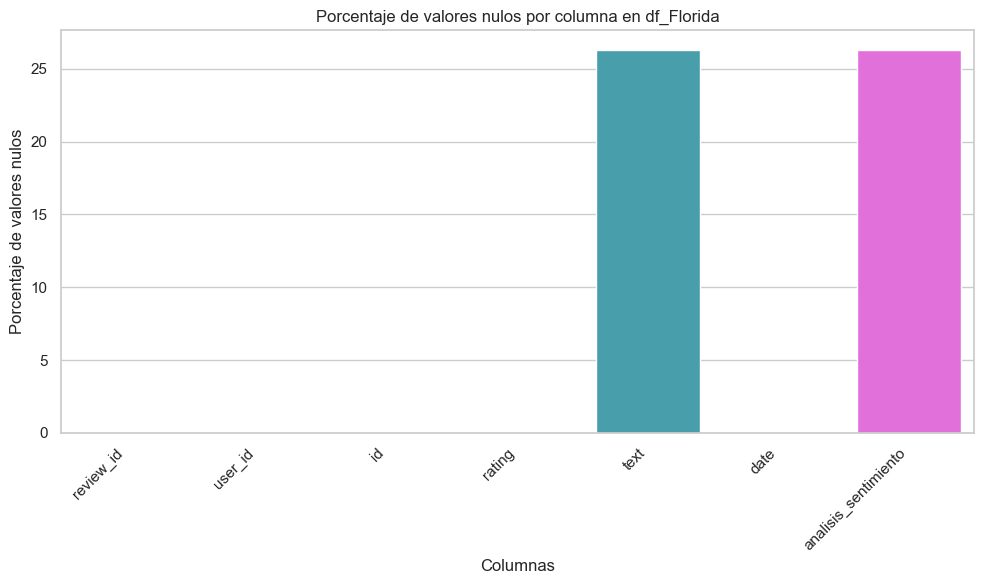

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplazar 'No message' con NaN en la columna analisis_sentimiento
df_final['analisis_sentimiento'] = df_final['analisis_sentimiento'].replace('No message', pd.NA)

# Calcular el porcentaje de valores nulos en cada columna
nulos_porcentaje = (df_final.isna().mean() * 100).round(2)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos_porcentaje.index, y=nulos_porcentaje.values, palette='husl')
plt.title('Porcentaje de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

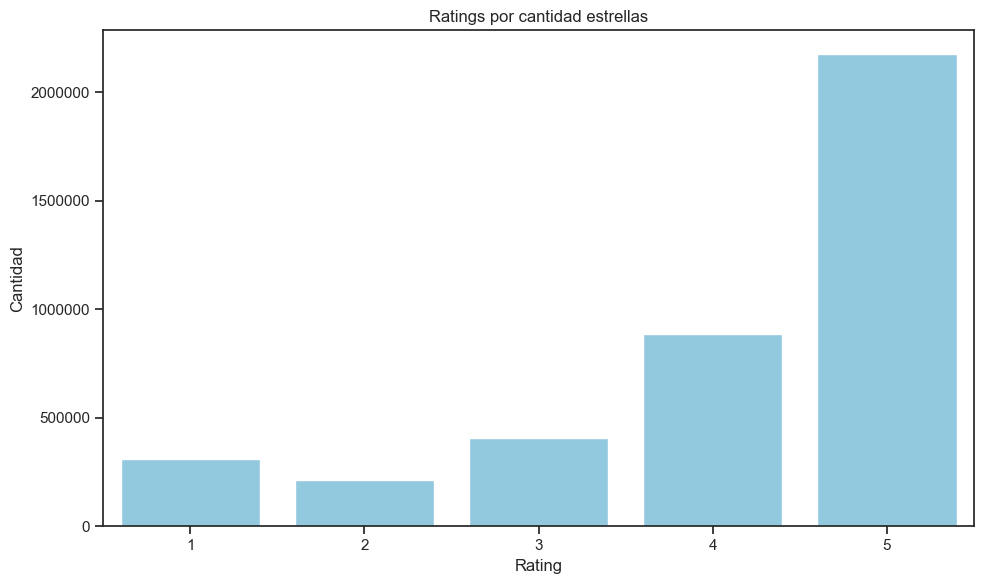

In [28]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

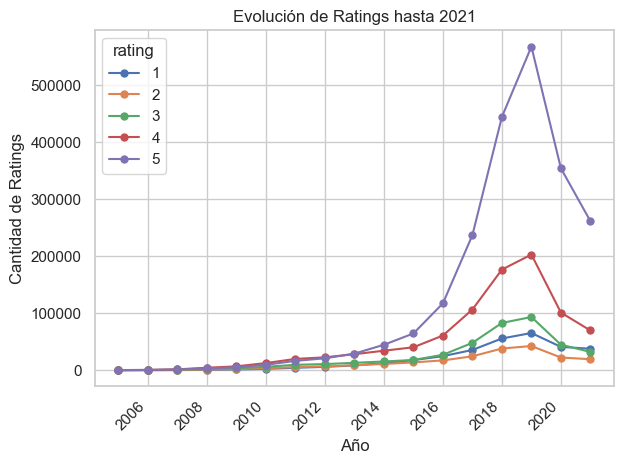

In [27]:
# Filtrar el DataFrame para incluir solo los datos hasta el año 2021
df_final = df_final[df_final['year'] <= 2021]

# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_final.groupby(['year', 'rating']).size().unstack(fill_value=0)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings hasta 2021')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
df_final.head()

,review_id,user_id,id,rating,text,date,analisis_sentimiento,year
0,---4VcQZzy_vIIifUDqxsg,EopuF3BhVXAGJWEje_TJ-g,X-dPdw1PluJnT-fpiWrfKw,1,After being seated for over 15 minutes without...,2018-09-16 00:38:13 UTC,Negative,2018
1,---HVvLfXsI5cUzNKl2F2g,vgbW-0hGSjsm2f3-naEzEg,b962PwucKGoezHh7Kwmn_Q,4,I really miss you. I hope you can reopen. With...,2020-10-30 22:04:14 UTC,Positive,2020
2,---K4uV8-6eB6hZeS5ylGg,c4gjYdd3u8vc8eE63xyCpA,4CmLe8tGT5fIYHOaAsb3-g,4,"Ah, yes, an eatery with my initials. AND the f...",2018-06-17 21:30:15 UTC,Positive,2018
3,---Nwr_Uc_e1IJvl3mvpeQ,J_8nhRN8_6GIVogg7Wh4AQ,KQnzEi-xfHlqUIRUZByTvw,5,"THE ABSOLUTE BEST! I have never been a poke, s...",2020-09-28 23:11:05 UTC,Positive,2020
4,---YF61Wj1IYOflVkL4ZrQ,SHmwFe5_ars1fUMgPfvVyQ,no8Sj8Eflgka2LFdrYFG_Q,5,Beyond Bread is a local chain bakery that simp...,2013-08-17 02:52:47 UTC,Positive,2013


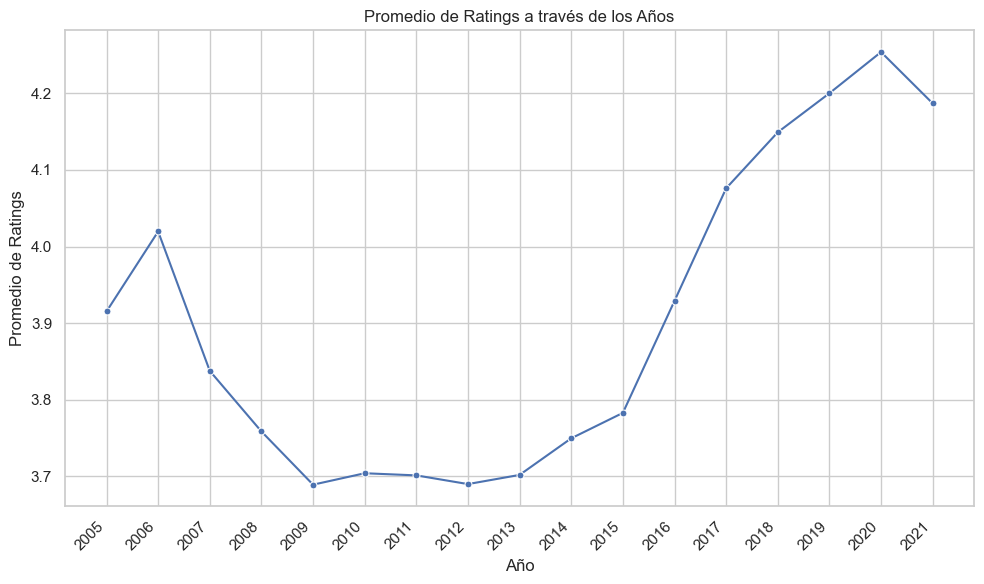

In [29]:

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_final.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mas adelante evaluaremos la cantidad de datos, pero en este grafico se ven posibles outliers en los primeros años, sobre todo ese dato de 1990. Con el logico aumetno de las reseñas a lo largo de los años, vemos una estabilizacion a partir del 2012 con una tendencia creciente en la satisfaccion del cliente en general, a pesar de un leve decaimiento hasta 2015.

Procedemos a ver la cantidad de reseñas por año

In [26]:

# Contar el número de reseñas por año
reviews_per_year = df_final.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
2005       224
2006       915
2007      3725
2008     11058
2009     18055
2010     33213
2011     54912
2012     66260
2013     86717
2014    116860
2015    153387
2016    246439
2017    450824
2018    797043
2019    971237
2020    562677
2021    419697
2022      6757
dtype: int64


Hay un constane crecimiento en la cantidad de reseñas hasta el año 2020, en el cual decrece. Esto se puede deber a la pandemia global de ese año

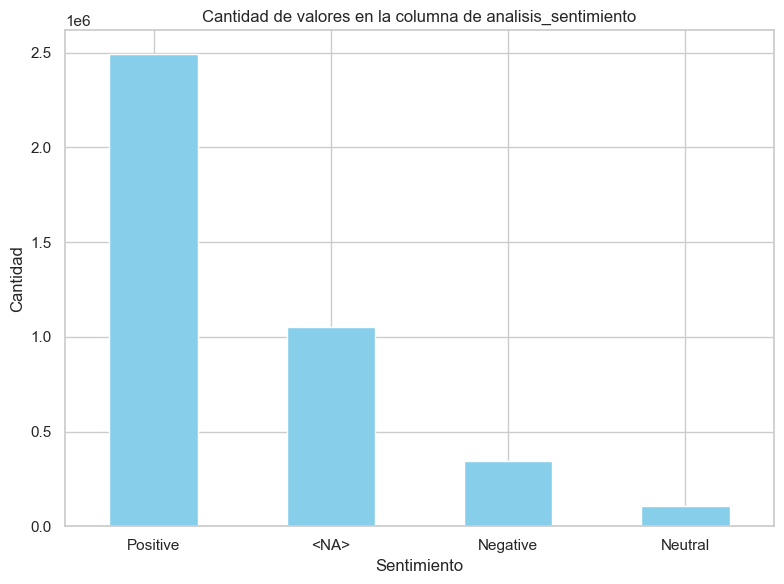

In [30]:
# Calcular la cantidad de valores de la columna de analisis_sentimiento
analisis_sentimiento_counts = df_final['analisis_sentimiento'].value_counts(dropna=False)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
analisis_sentimiento_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores en la columna de analisis_sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

# Ruta del archivo JSON
ruta_archivo = 'locales.json'

# Leer el archivo JSON en un DataFrame de Pandas
locales = pd.read_json(ruta_archivo, lines=True)

In [39]:
# Ruta del archivo JSON
ruta_archivo = 'tip.json'

# Leer el archivo JSON en un DataFrame de Pandas
tip = pd.read_json(ruta_archivo, lines=True)

In [41]:
# Ruta del archivo JSON
ruta_archivo = 'Users.json'

# Leer el archivo JSON en un DataFrame de Pandas
users = pd.read_json(ruta_archivo, lines=True)

In [44]:
users.head()

,name,user_id,review_count,average_stars,yelping_since
0,Amanda “Mandy” Witmer,1.1347867473466414e+20,NaN,NaN,NaN
1,Alexander Adame,1.0276437449670767e+20,NaN,NaN,NaN
2,Katie Garino,1.0407037802010382e+20,NaN,NaN,NaN
3,Vanessa Barrios,1.1825898608640986e+20,NaN,NaN,NaN
4,SHONDA DAVIS,1.0038885961161848e+20,NaN,NaN,NaN


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229520 entries, 0 to 4229519
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   name           object 
 1   user_id        object 
 2   review_count   float64
 3   average_stars  float64
 4   yelping_since  object 
dtypes: float64(2), object(3)
memory usage: 161.3+ MB


In [45]:
tip.head()

,user_id,business_id,text,date,compliment_count,analisis_sentimiento,id
0,i9MTU9RFVmB1Nk8Hf7NSLw,-0G_6-KFGpCpxTUlVXCMYQ,What did I just eat? Veggie taco is sweet and ...,2014-05-02 06:31:40+00:00,0,Neutral,679737
1,7PmVpxl416hSW0qmj--s8Q,-0TffRSXXIlBYVbb5AwfTg,Solid.,2021-12-13 00:00:33+00:00,0,Neutral,541587
2,15dbmnbj1R39edU_wpLNTw,-0TffRSXXIlBYVbb5AwfTg,Their Spinach Chaat is the best spinach I've e...,2014-08-21 12:57:05+00:00,0,Neutral,584958
3,7L-cWTeRxVH-KLcuY-RAyw,-0fOUV_llBAPMo7exZFHPA,The number on this post does not work and I ca...,2016-05-03 16:46:21+00:00,1,Neutral,182223
4,bYC41edZYO3-AWYEPBmYRg,-0gRYq5UjMtZbELj0KHxzA,Slow line. Good draft coffee. No wifi.,2017-06-07 21:45:45+00:00,0,Neutral,678586


In [48]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908848 entries, 0 to 908847
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   user_id               908848 non-null  object             
 1   business_id           908848 non-null  object             
 2   text                  908848 non-null  object             
 3   date                  908848 non-null  datetime64[ns, UTC]
 4   compliment_count      908848 non-null  int64              
 5   analisis_sentimiento  908848 non-null  object             
 6   id                    908848 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 48.5+ MB


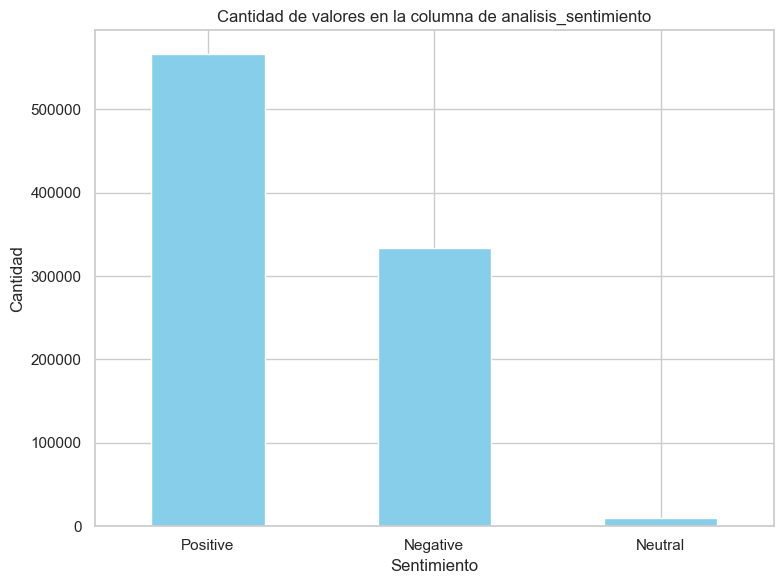

In [47]:
# Calcular la cantidad de valores de la columna de analisis_sentimiento
analisis_sentimiento_counts = tip['analisis_sentimiento'].value_counts(dropna=False)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
analisis_sentimiento_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores en la columna de analisis_sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
locales.head()

,name,id,subcategoria,review_count,avg_rating,latitude,longitude,state
0,Hip Hop Crab,zi7z6IE74Iq9wqWbHcJfuA,Bar,22,2.5,28.033580,-82.404203,FL
1,Budweiser Brew House,C7VzPu_rDtwLfEB1CyYWaQ,Bar,26,2.5,38.744154,-90.367565,FL
2,Jackson Brewery,2OcVR4GRcmVsC118dn2QWA,Bar,41,2.5,29.955925,-90.062962,FL
3,Olive Garden Italian Restaurant,q57zXsyVxipFR6BCbyHHyw,Bar,91,3.0,39.940426,-75.012613,PA
4,South Rio,c6qTaf6hx_4SjgLNU4oh-g,Bar,8,3.0,40.218808,-74.765755,FL


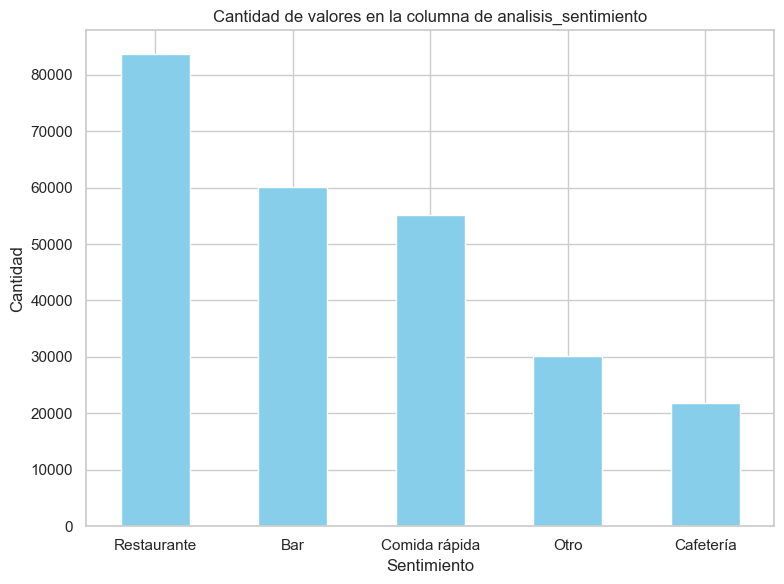

In [51]:
# Calcular la cantidad de valores de la columna de analisis_sentimiento
subcategorias_counts = locales['subcategoria'].value_counts(dropna=False)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
subcategorias_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores en la columna de analisis_sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

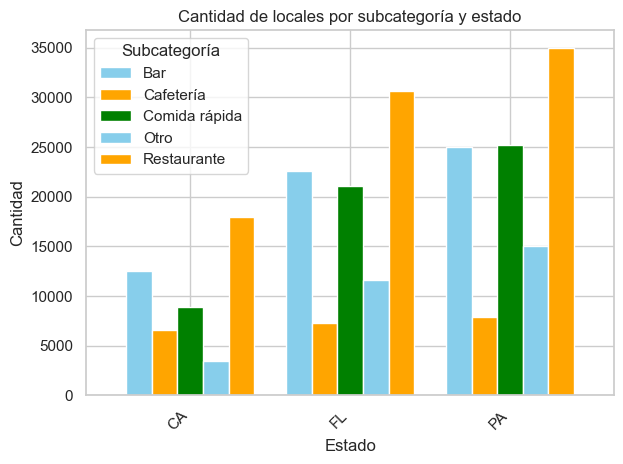

In [57]:
# Calcular la cantidad de valores de la columna de subcategoria para cada estado
subcategorias_por_estado = locales.groupby(['state', 'subcategoria']).size()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
subcategorias_por_estado.unstack().plot(kind='bar', color=['skyblue', 'orange', 'green'], width=0.8)
plt.title('Cantidad de locales por subcategoría y estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subcategoría')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

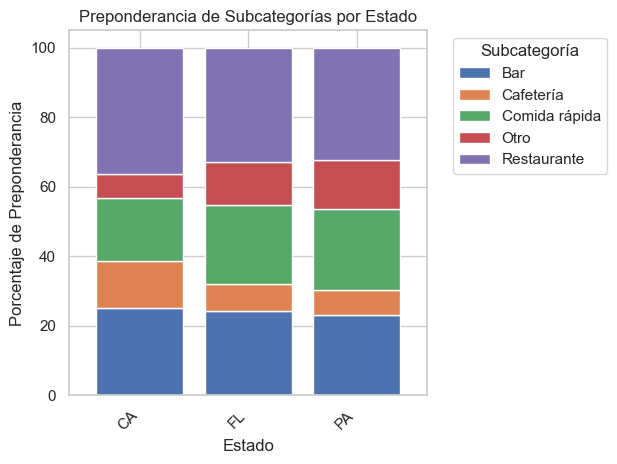

In [59]:
# Crear el gráfico de barras apilado con Seaborn
plt.figure(figsize=(12, 6))
ponderacion_por_estado.plot(kind='bar', stacked=True, width=0.8)
plt.title('Preponderancia de Subcategorías por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Preponderancia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subcategoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()